# Read the configuration files

## Create the crowd object

In [1]:
import os
import pprint
from pathlib import Path

import matplotlib.pyplot as plt

import configuration.backup.dict_to_xml_and_reverse as fun_xml
import configuration.utils.functions as fun
from configuration.models.crowd import create_agents_from_dynamic_static_geometry_parameters
from streamlit_app.plot import plot

# Open the configuration files, read them, and convert them to dictionaries
cwd = Path(os.path.abspath(""))  # Current working directory
config_files_folder_path = (
    cwd.parent.parent / "data" / "tutorial_configuration_files"
)

with open(config_files_folder_path / "Agents.xml", encoding="utf-8") as f:
    crowd_xml = f.read()
static_dict = fun_xml.static_xml_to_dict(crowd_xml)

with open(config_files_folder_path / "Geometry.xml", encoding="utf-8") as f:
    geometry_xml = f.read()
geometry_dict = fun_xml.geometry_xml_to_dict(geometry_xml)

with open(config_files_folder_path / "AgentDynamics.xml", encoding="utf-8") as f:
    dynamic_xml = f.read()
dynamic_dict = fun_xml.dynamic_xml_to_dict(dynamic_xml)

# Create the Crowd object and populate it with the data from the dictionaries
crowd = create_agents_from_dynamic_static_geometry_parameters(
    static_dict=static_dict,
    dynamic_dict=dynamic_dict,
    geometry_dict=geometry_dict,
)

## Display the crowd

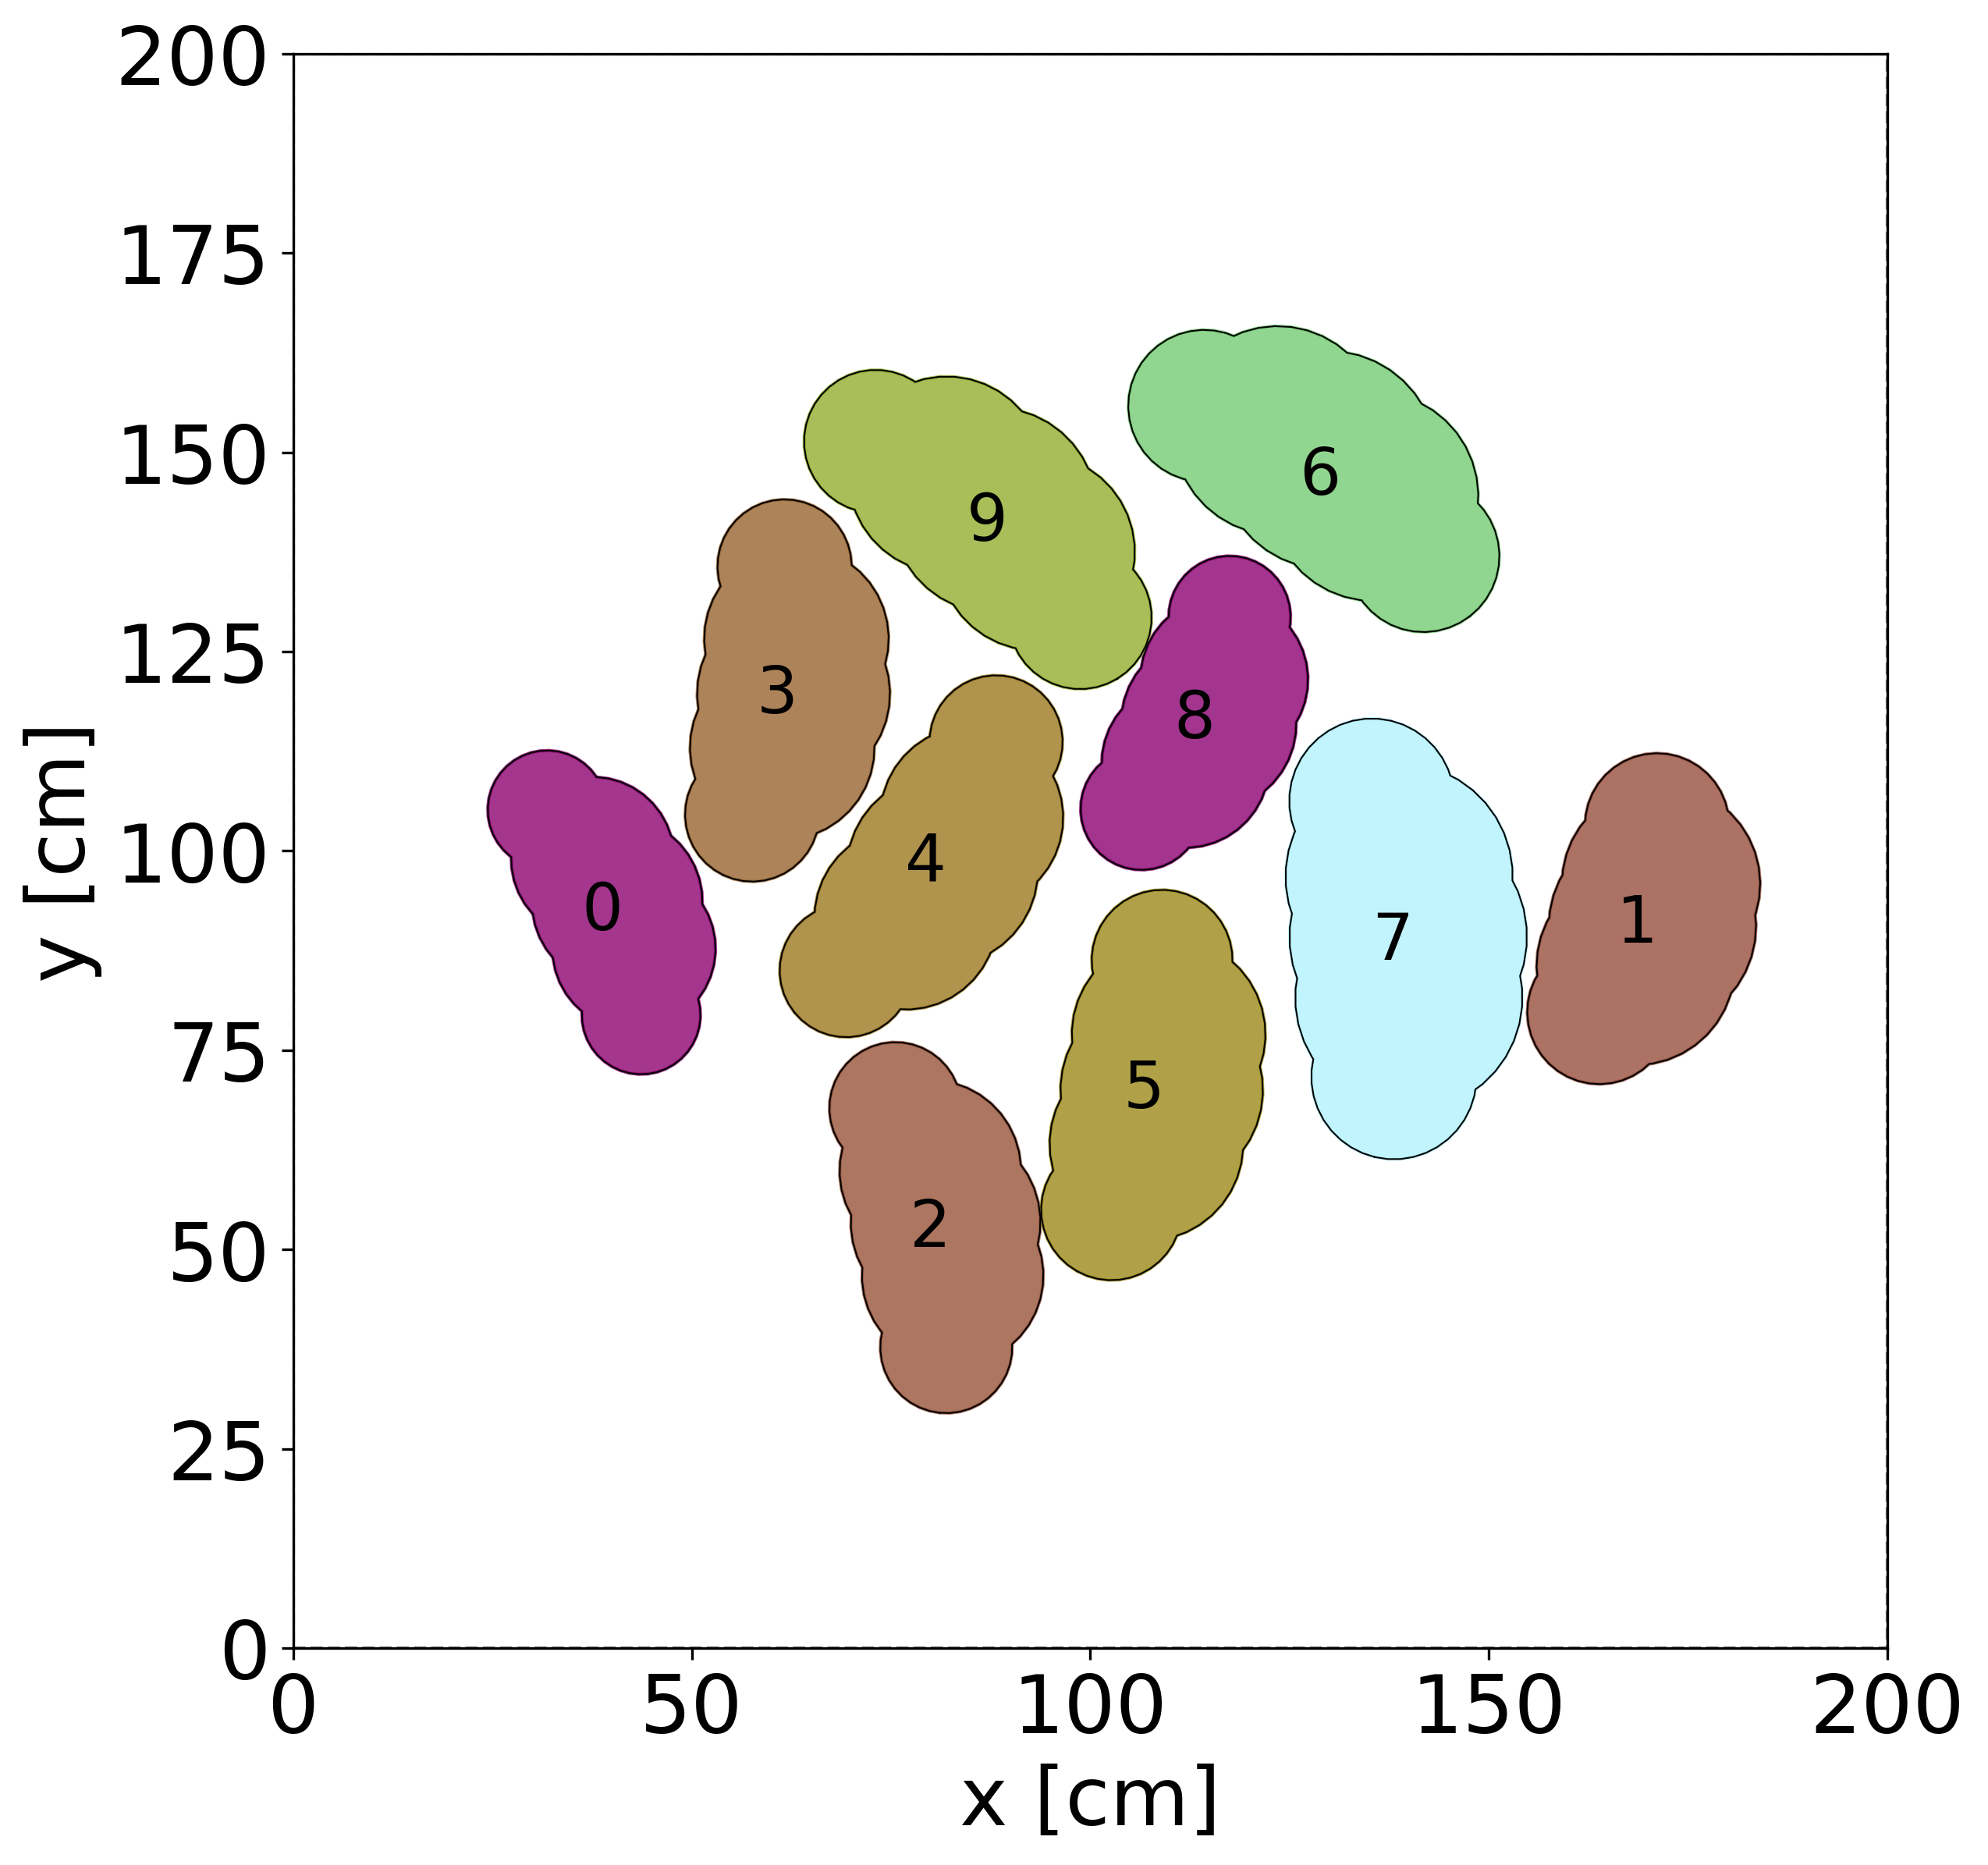

In [2]:
plot.display_crowd2D(crowd)[0]
plt.show()

## Get some anthropometric statistics from the created crowd

In [3]:
crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))
# As the sex is not given in the config files, by default it is set to "male"

{'bike_proportion': 0.0,
 'male_bideltoid_breadth_max': 55.39999999999999,
 'male_bideltoid_breadth_mean': 48.32,
 'male_bideltoid_breadth_min': 41.800000000000004,
 'male_bideltoid_breadth_std_dev': 4.5997101357947905,
 'male_chest_depth_max': 29.799999999999997,
 'male_chest_depth_mean': 24.98,
 'male_chest_depth_min': 21.4,
 'male_chest_depth_std_dev': 2.486318116769811,
 'male_height_max': 185.0,
 'male_height_mean': 169.4,
 'male_height_min': 155.0,
 'male_height_std_dev': 8.745792639257397,
 'male_proportion': 1.0,
 'male_weight_max': 104.33,
 'male_weight_mean': 77.701,
 'male_weight_min': 54.43,
 'male_weight_std_dev': 16.754470348735786,
 'pedestrian_proportion': 1.0}


The lengths are in centimeters, the weight are in kilograms.

In [4]:
# Print the numbers observables
pprint.pprint(crowd_statistics["stats_counts"])

{'bike_number': 0, 'male_number': 10, 'pedestrian_number': 10}


In [5]:
# Print the detailed distribution of the other observables
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["stats_lists"]))

{'male_bideltoid_breadth': [43.2,
                            42.599999999999994,
                            47.2,
                            48.2,
                            51.0,
                            49.6,
                            52.400000000000006,
                            55.39999999999999,
                            41.800000000000004,
                            51.800000000000004],
 'male_chest_depth': [21.4,
                      26.0,
                      23.799999999999997,
                      24.2,
                      24.0,
                      25.4,
                      27.400000000000002,
                      29.799999999999997,
                      22.0,
                      25.8],
 'male_height': [160.0,
                 155.0,
                 175.0,
                 175.0,
                 173.0,
                 173.0,
                 185.0,
                 170.0,
                 163.0,
                 165.0],
 'male_weight': [63.5,
   